In [32]:
## NAME: FAKHRUDDIN KHAMERAWALA
## IOT AND COMPUTER VISION INTERN (FEB21 BATCH)
## TASK: Color Identification in Images 

In [3]:
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

import numpy as np

import cv2

from collections import Counter

from skimage.color import rgb2lab, deltaE_cie76

import os



%matplotlib inline

The type of this input is <class 'numpy.ndarray'>
Shape: (525, 700, 3)


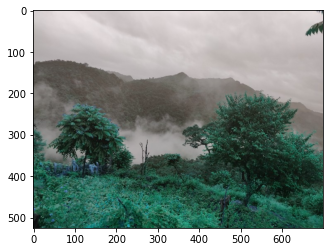

In [4]:
image = cv2.imread('sample_image.jpg')

print("The type of this input is {}".format(type(image)))

print("Shape: {}".format(image.shape))

plt.imshow(image)

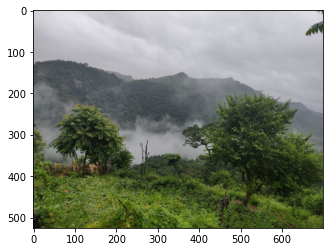

In [5]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

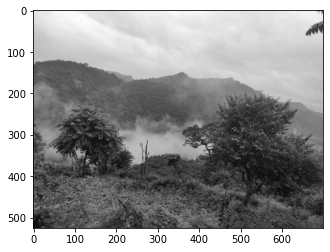

In [6]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_image, cmap='gray')

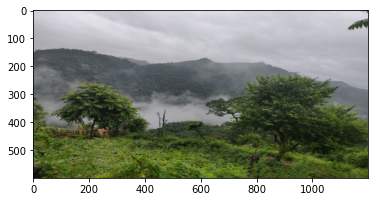

In [7]:
resized_image = cv2.resize(image, (1200, 600))

plt.imshow(resized_image)

In [8]:
def RGB2HEX(color):

    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [9]:
def get_image(image_path):

    image = cv2.imread(image_path)

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    return image

In [24]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[array([205.67870884, 205.36676807, 212.86193629]),
 array([28.41296012, 37.50122699, 18.01395706]),
 array([119.45934959, 123.89567822, 123.52909713]),
 array([52.73480049, 65.14264269, 32.26057585]),
 array([178.53301861, 179.13737169, 185.55014547]),
 array([106.18392077, 121.79114477,  55.91634139]),
 array([82.72026823, 89.36427585, 90.43353494]),
 array([76.02693036, 92.31362648, 38.23234448])]

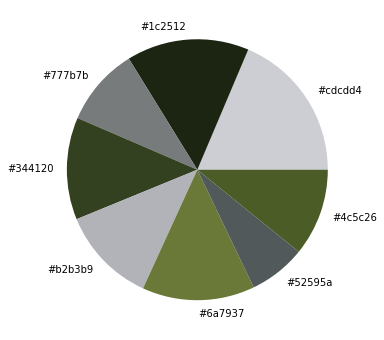

In [25]:
get_colors(get_image('sample_image.jpg'), 8, True)